# Importing Libraries

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.metrics import mean_squared_error, r2_score

In [66]:
from tensorflow.keras.losses import MeanSquaredError

In [9]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
pip install setuptools

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
from tensorflow.keras.models import Sequential

In [12]:
from tensorflow.keras.layers import Dense

In [13]:
from tensorflow.keras.layers import Dense , Input

In [14]:
import tensorflow as tf

In [15]:
from tensorflow.keras import layers, models

In [16]:
from tensorflow.keras.optimizers import Adam

In [17]:
from sklearn.datasets import load_diabetes

# 1. Loading and Preprocessing

In [18]:
# Load the Dataset
diabetes = load_diabetes()

# Dataset
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [19]:
X = diabetes.data
y = diabetes.target

In [22]:
# Convert to Dataframe for easier manipulation

data = pd.DataFrame(X, columns=diabetes.feature_names)
data['target'] = y

# Check for missing values
data.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

In [24]:
# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized,y, test_size=0.2, random_state=42)

In [25]:
# Check the shapes of the resulting datasets
print(f"Training set shape : {X_train.shape}, {y_train.shape}")
print(f"Training set shape : {X_test.shape}, {y_test.shape}")
      

Training set shape : (353, 10), (353,)
Training set shape : (89, 10), (89,)


In [26]:
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [27]:
data.tail()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0
441,-0.045472,-0.044642,-0.073030,-0.081413,0.083740,0.027809,0.173816,-0.039493,-0.004222,0.003064,57.0


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [29]:
data.size

4862

In [30]:
data.shape

(442, 11)

In [31]:
data.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'target'],
      dtype='object')

In [32]:
data.dtypes

age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object

In [34]:
# Finding Duplicates
data.duplicated().sum()

0

In [35]:
X = data.drop(columns=['target'])

In [36]:
# Initailize the StandardScaler
scaler = StandardScaler()

In [37]:
# Fit the scaler on the training data and transform both the training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
# Now X_train_scaled and X_test_scaled are normalized and can be used for ANN training.

print(X_train_scaled,"\n",X_test_scaled)

[[ 1.49836523  1.06136988  0.21990201 ...  0.71103773  0.54748197
  -0.06144896]
 [-0.22885822  1.06136988 -0.41936607 ...  1.4842858  -0.01975653
   0.36723647]
 [ 0.08518241 -0.94217861  1.01898711 ... -0.06221033  0.3312366
  -0.31866022]
 ...
 [ 0.63475351 -0.94217861 -0.46502808 ... -0.83545839 -0.25375196
  -0.06144896]
 [-0.30736838 -0.94217861 -0.53352109 ... -0.06221033 -0.83072436
  -0.83308273]
 [-2.03459183 -0.94217861  0.56236706 ... -0.83545839 -0.13312789
  -0.06144896]] 
 [[ 9.48794133e-01 -9.42178611e-01 -1.68225039e-01 -3.54924745e-01
   2.63158584e+00  2.64916600e+00  4.29486950e-01  7.11037735e-01
   6.53600610e-01 -1.47186045e-01]
 [ 1.96942617e+00 -9.42178611e-01  7.45015079e-01  4.27541124e-01
  -5.11434037e-01 -3.33282444e-01  3.76314490e-02 -8.35458386e-01
  -4.96908703e-01 -4.90134388e-01]
 [ 1.34134492e+00  1.06136988e+00 -1.22563033e-01 -2.83791484e-01
   2.17022512e+00  1.04272578e+00  1.21319795e+00 -6.22103255e-02
   1.74360703e+00 -4.04397302e-01]
 [ 2.0

# 2.Exploratory Data Analysis (EDA)


In [39]:
# Summary statistics 

In [40]:
data.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


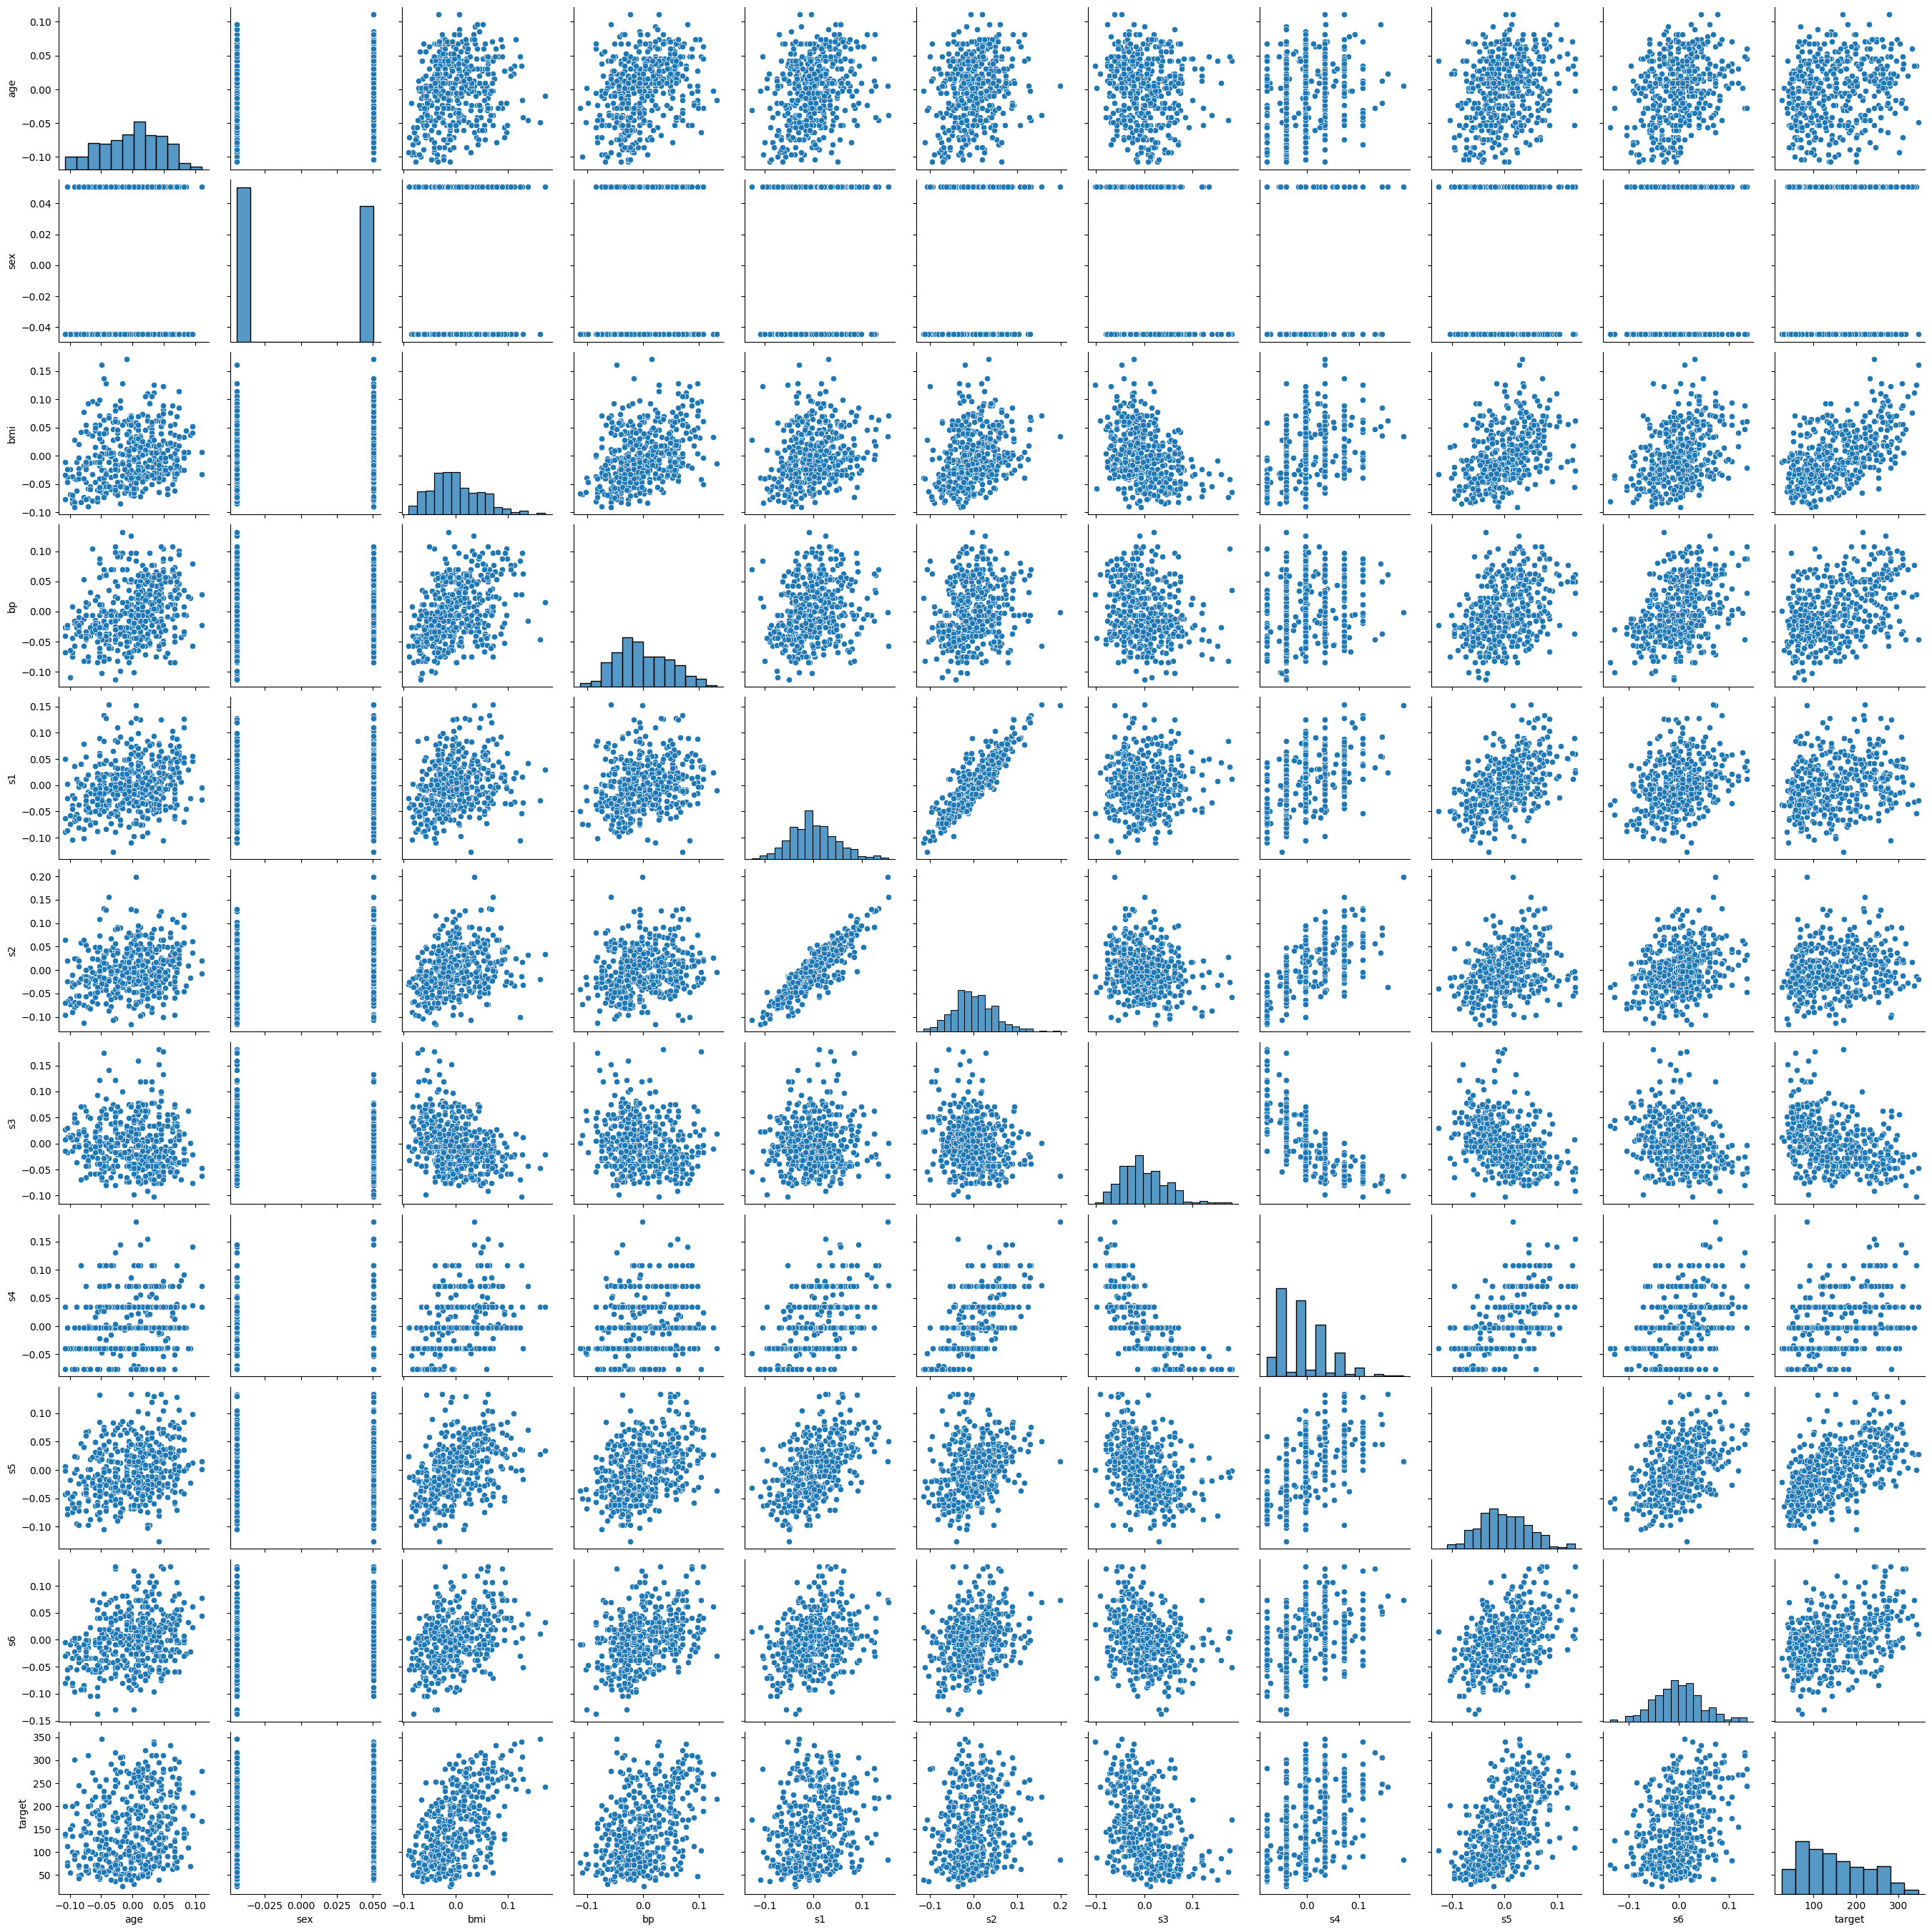

In [41]:
# Pairplot to visualize relationships between features and target
sns.pairplot(data)
plt.show()

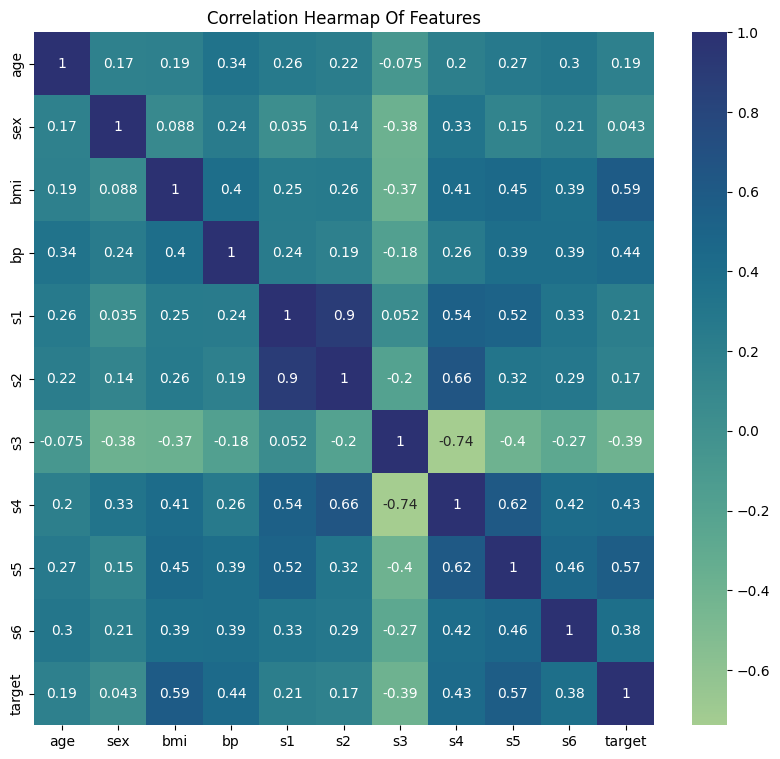

In [44]:
# Correlation heatmap
plt.figure(figsize=(10,9))
sns.heatmap(data.corr(), annot=True, cmap='crest',)
plt.title('Correlation Hearmap Of Features')
plt.show()

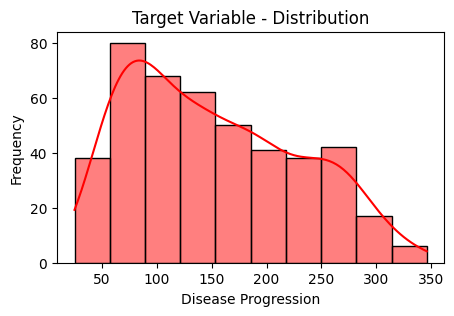

In [47]:
# Distribution Of target variable
plt.figure(figsize=(5,3))
sns.histplot(y, kde=True,color='red')
plt.title('Target Variable - Distribution')
plt.xlabel('Disease Progression')
plt.ylabel('Frequency')
plt.show()

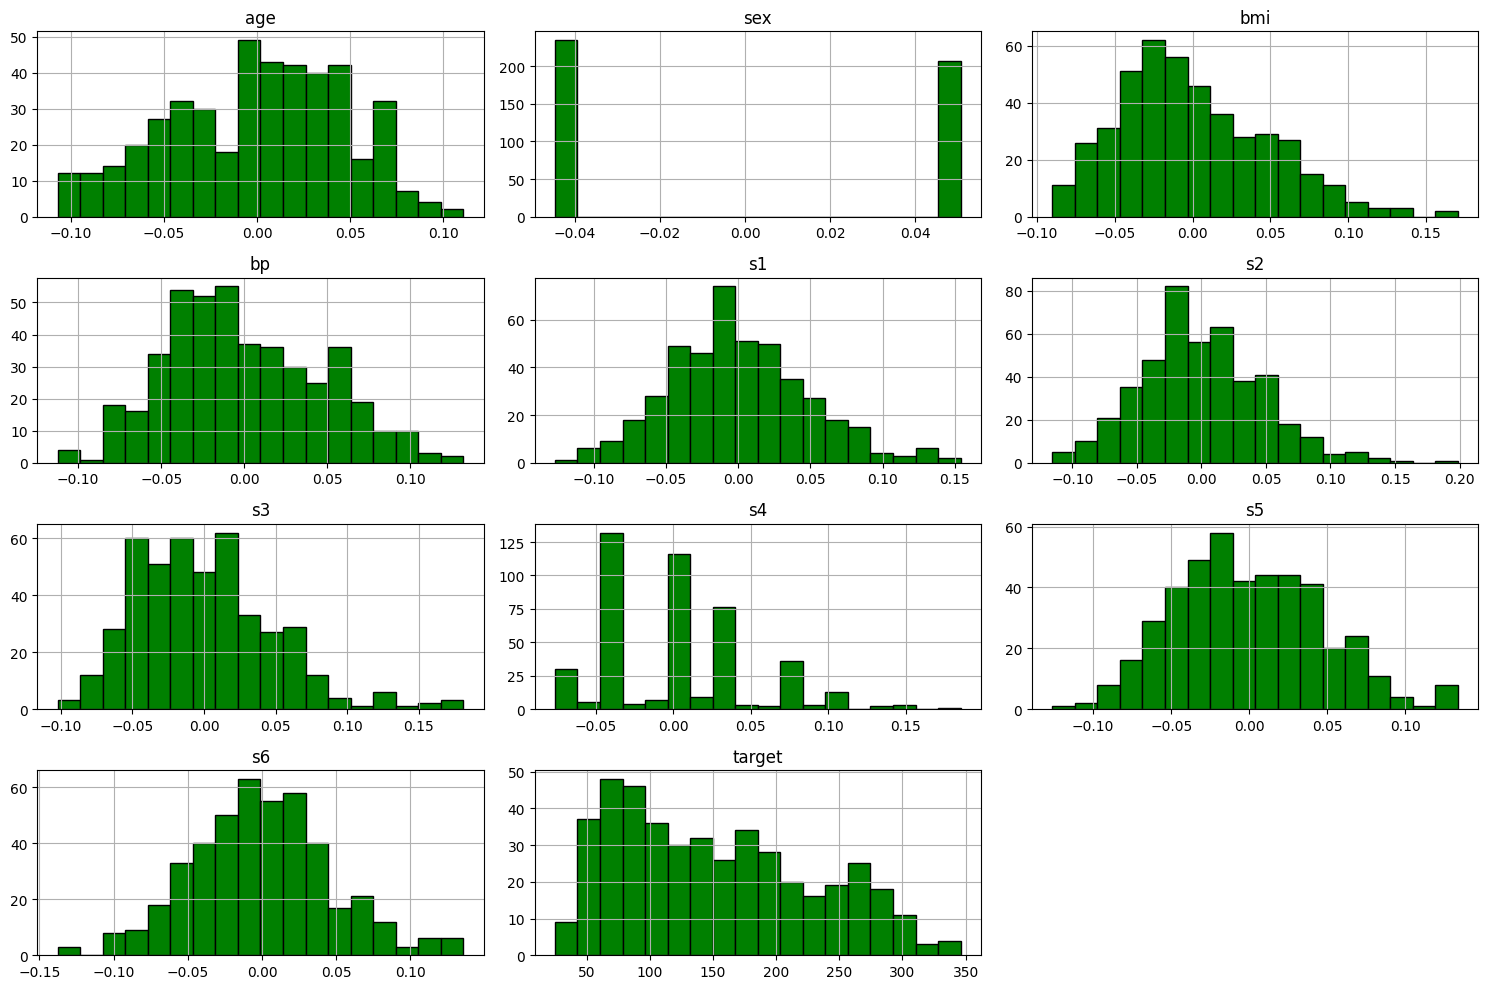

In [48]:
# Plot histograms for all numerical features
data.hist(figsize=(15, 10), bins=18, edgecolor='black',color='green')
plt.tight_layout()
plt.show()

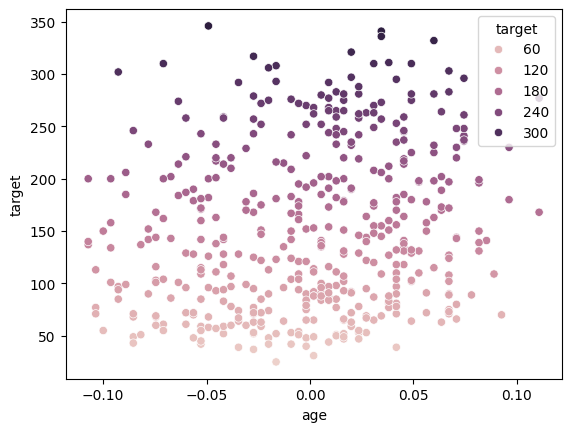

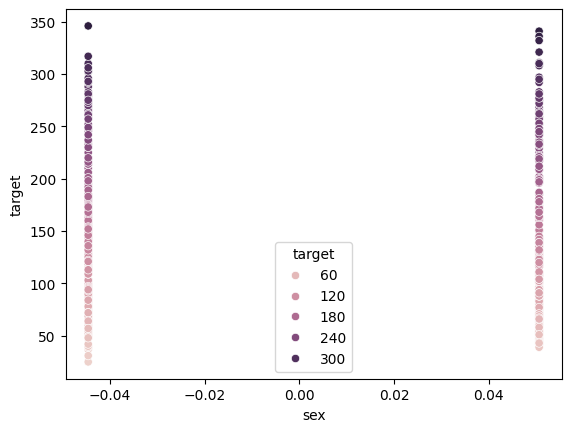

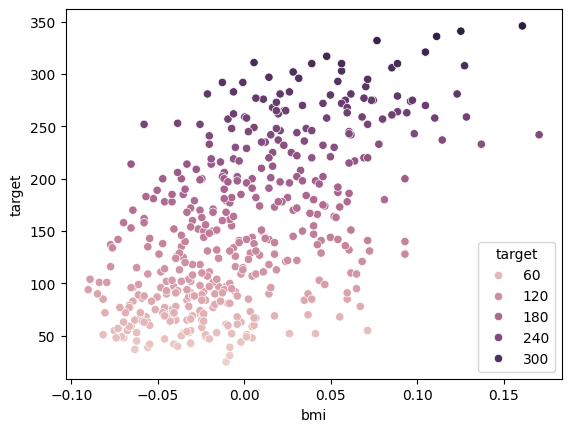

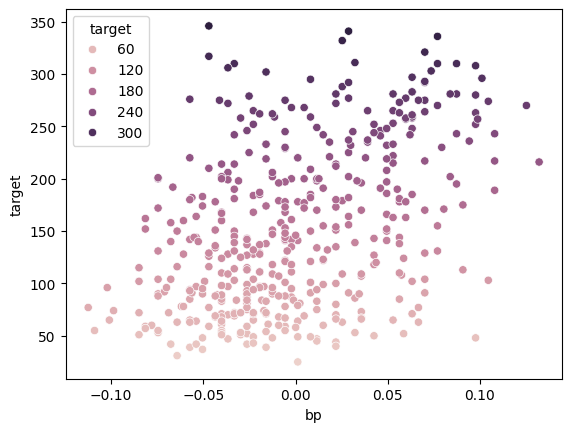

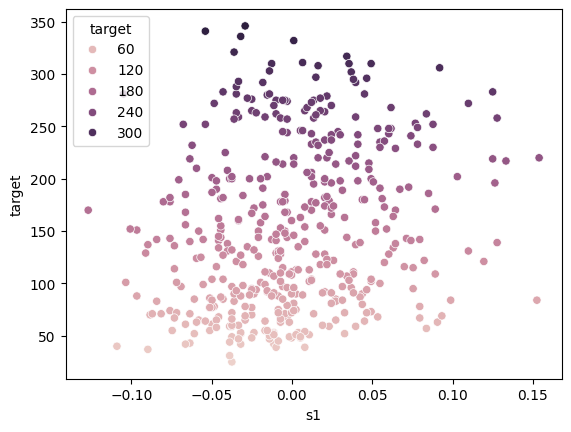

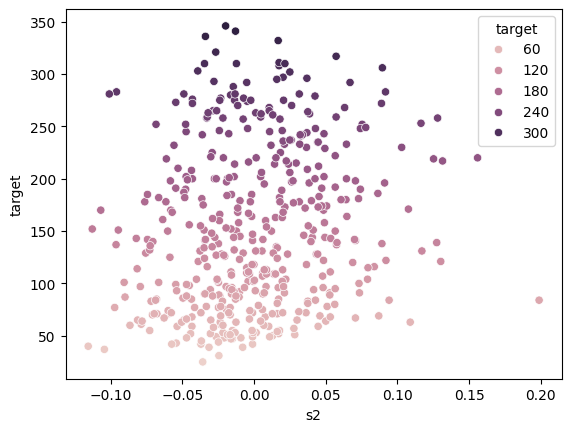

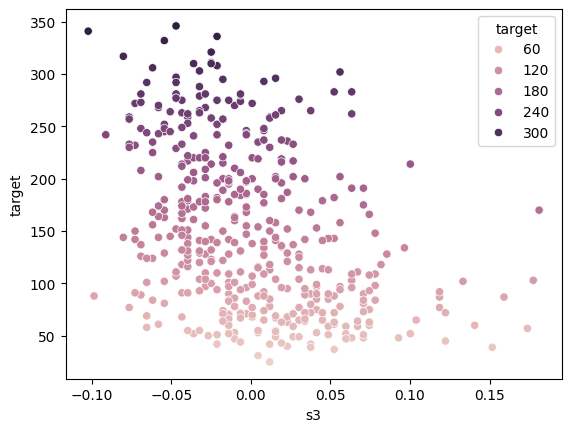

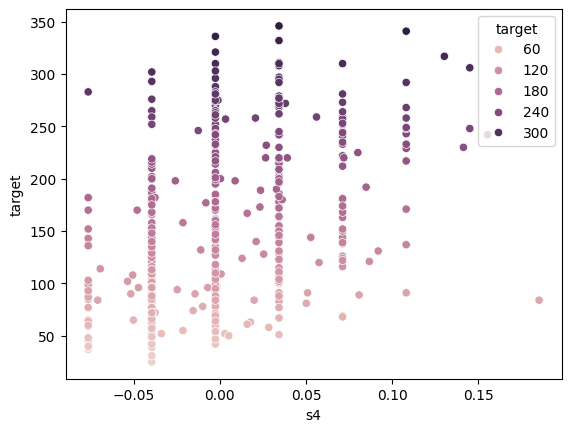

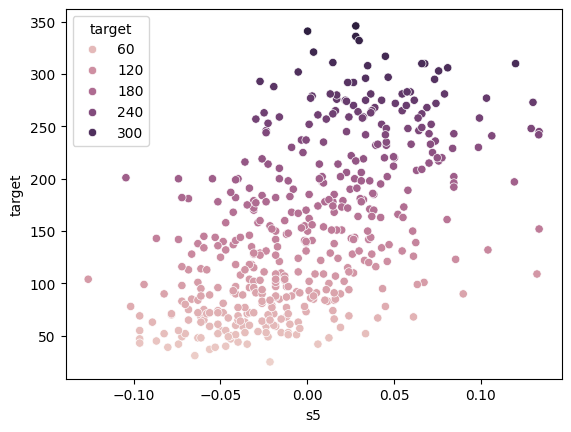

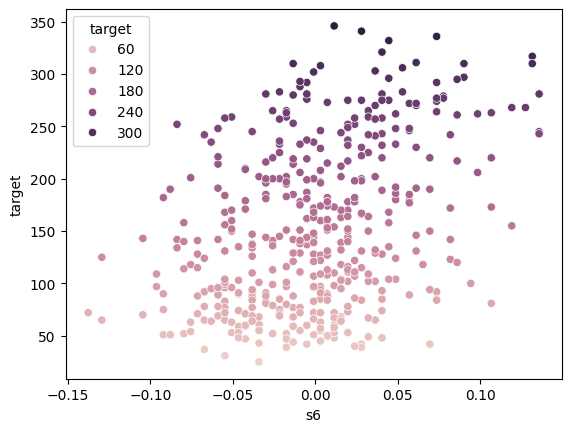

In [58]:
#Scatter Plot to understand the relationships
for i in ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']:
   sns.scatterplot(data=data,x=i,y='target',hue='target')
   plt.show()

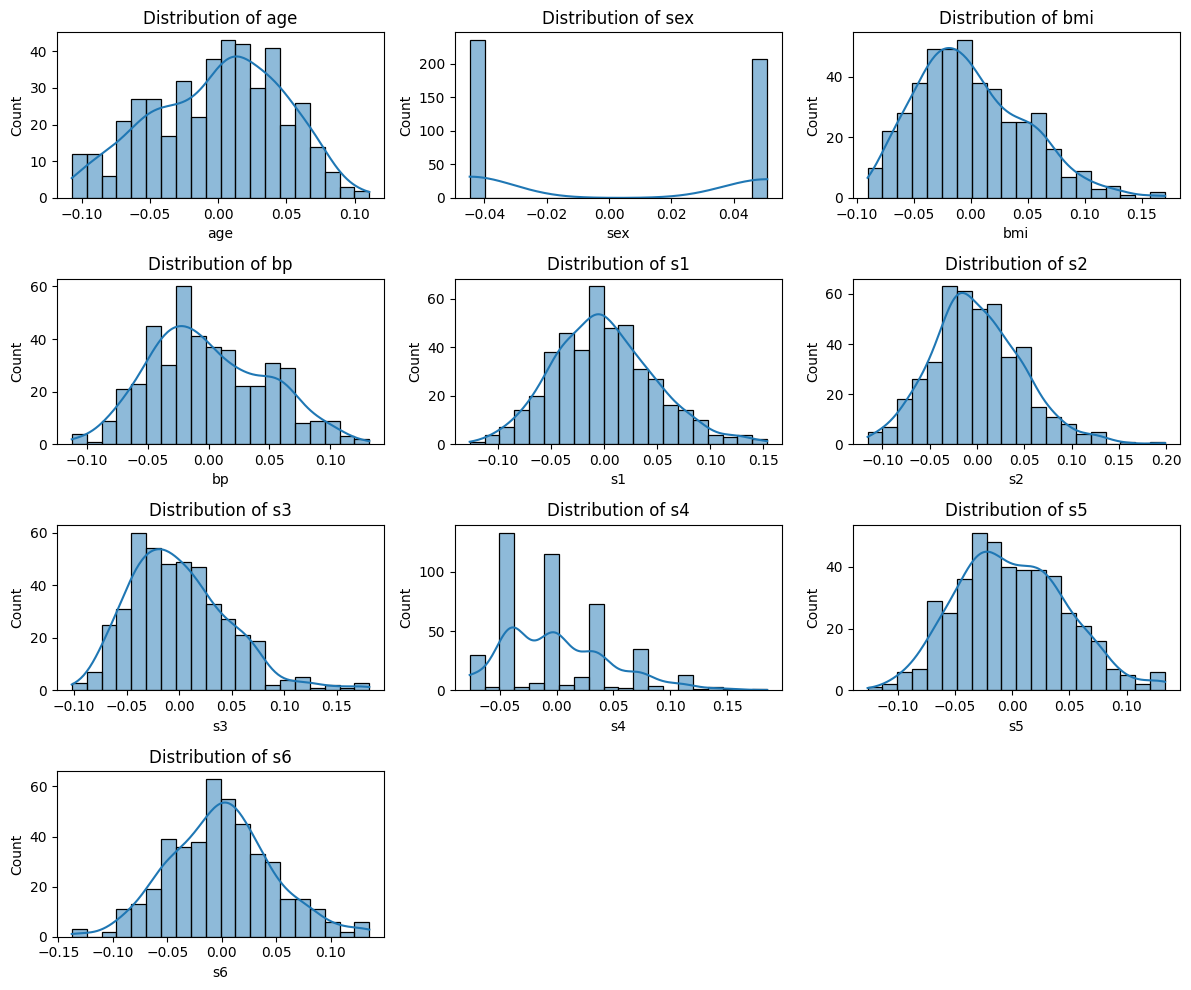

In [60]:
plt.figure(figsize=(12, 10))
for i, col in enumerate(data.columns[:-1]):  # Exclude the target column
    plt.subplot(4, 3, i + 1)
    sns.histplot(data[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [61]:
print(len(diabetes.feature_names))

10


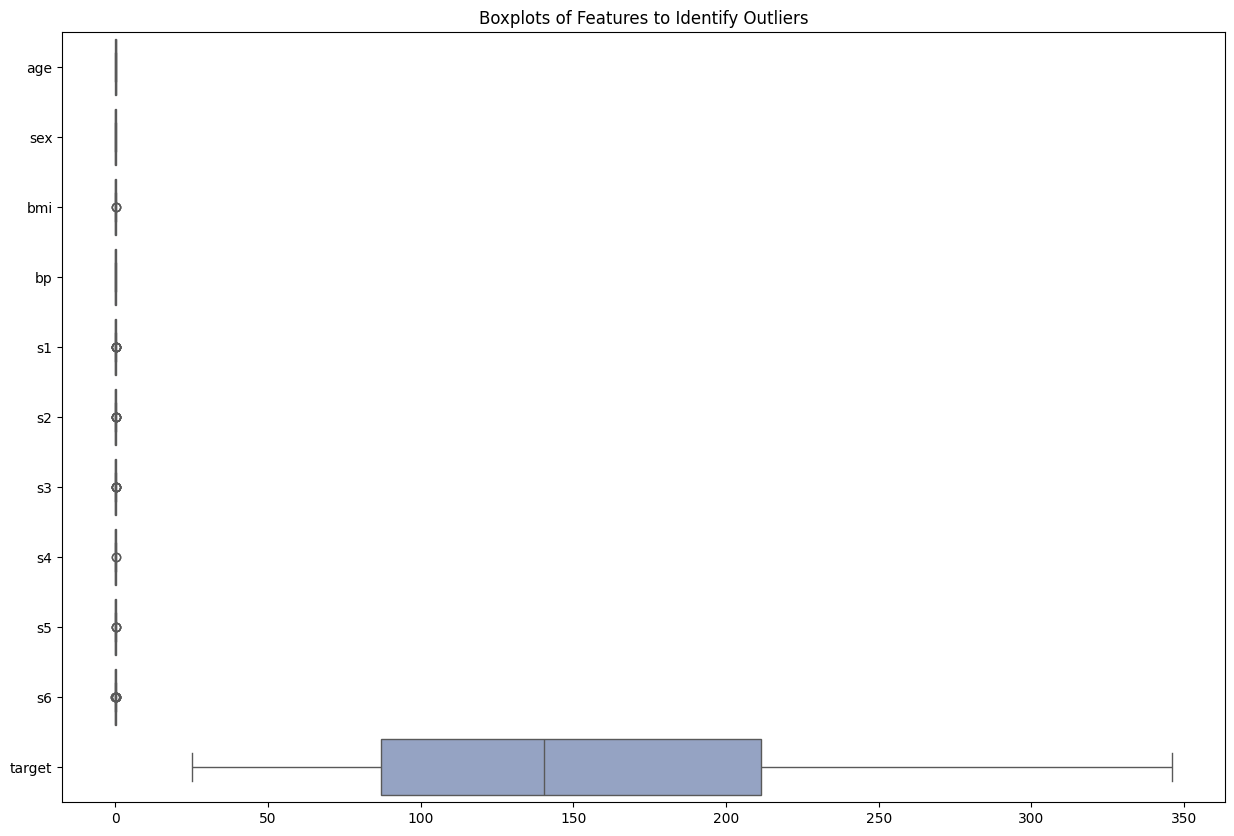

In [63]:

plt.figure(figsize=(15, 10))
sns.boxplot(data=data, orient="h", palette="Set2")
plt.title('Boxplots of Features to Identify Outliers')   #for identify outlayers
plt.show()

In [64]:
# Calculate correlation matrix
correlation_matrix = data.corr()
print(correlation_matrix)

             age       sex       bmi        bp        s1        s2        s3  \
age     1.000000  0.173737  0.185085  0.335428  0.260061  0.219243 -0.075181   
sex     0.173737  1.000000  0.088161  0.241010  0.035277  0.142637 -0.379090   
bmi     0.185085  0.088161  1.000000  0.395411  0.249777  0.261170 -0.366811   
bp      0.335428  0.241010  0.395411  1.000000  0.242464  0.185548 -0.178762   
s1      0.260061  0.035277  0.249777  0.242464  1.000000  0.896663  0.051519   
s2      0.219243  0.142637  0.261170  0.185548  0.896663  1.000000 -0.196455   
s3     -0.075181 -0.379090 -0.366811 -0.178762  0.051519 -0.196455  1.000000   
s4      0.203841  0.332115  0.413807  0.257650  0.542207  0.659817 -0.738493   
s5      0.270774  0.149916  0.446157  0.393480  0.515503  0.318357 -0.398577   
s6      0.301731  0.208133  0.388680  0.390430  0.325717  0.290600 -0.273697   
target  0.187889  0.043062  0.586450  0.441482  0.212022  0.174054 -0.394789   

              s4        s5        s6   

In [65]:
print(data.corr()['target'].sort_values(ascending=False))

target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
s3       -0.394789
Name: target, dtype: float64


# 3. Building the ANN Model

In [69]:
# Initialize the model
model = Sequential()

# Add the input layer and one hidden layer
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))

# Add the output layer
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss=MeanSquaredError(), metrics=['mse'])

In [70]:
# Display the model architecture
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,817 (11.00 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)

In [72]:
# Building the ANN model
model = Sequential()

# Add an Input layer as the first layer
model.add(Input(shape=(X_train.shape[1],)))

# Add a hidden layer
model.add(Dense(64, activation='relu'))

# Add an output layer
model.add(Dense(1, activation='linear'))


# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')

In [73]:
# Display the model architecture
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 769 (3.00 KB)

 Trainable params: 769 (3.00 KB)

 Non-trainable params: 0 (0.00 B)

# 4.Training the ANN Model

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 31299.8516 - val_loss: 21733.0273
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 30142.1211 - val_loss: 20725.8516
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 28782.5156 - val_loss: 19254.7051
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 24905.3477 - val_loss: 17248.5273
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 22824.7969 - val_loss: 14787.3701
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 19685.5508 - val_loss: 12109.5049
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 14137.3311 - val_loss: 9584.7080
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 10064.7061 - val_loss: 7524.6450
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9300.8281 - val_loss: 6098.1528
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6998.5049 - val_loss: 5325.1514
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5640.9727 - val_loss: 4962.6

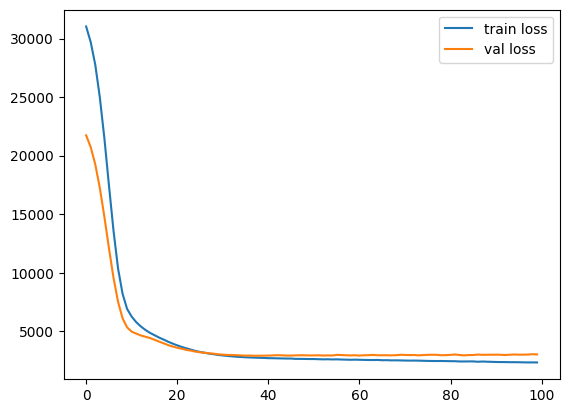

In [74]:
# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=1)

# Plot training history
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# 5.Evaluating the Model


In [75]:
# Evaluate the model on the testing data
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Mean Squared Error: 2708.0325362216145
R² Score: 0.48887222096274974


# 6.Improving the Model

In [76]:

# Experimenting with different architectures, activation functions, or hyperparameters

# Optionally, we can increase the number of hidden layers or units in the hidden layers
model_improved = Sequential()
model_improved.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model_improved.add(Dense(64, activation='relu'))
model_improved.add(Dense(32, activation='relu'))
model_improved.add(Dense(1, activation='linear'))

In [77]:

# Compile the improved model
model_improved.compile(optimizer=Adam(learning_rate=0.001), loss=MeanSquaredError(), metrics=['mse'])

# Train the improved model
history_improved = model_improved.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=1)


Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 30621.9844 - mse: 30621.9844 - val_loss: 22268.5000 - val_mse: 22268.5000
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 32238.4062 - mse: 32238.4062 - val_loss: 21941.1758 - val_mse: 21941.1758
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 29439.3750 - mse: 29439.3750 - val_loss: 21361.8945 - val_mse: 21361.8945
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 27328.8125 - mse: 27328.8125 - val_loss: 20356.4375 - val_mse: 20356.4375
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 27616.2969 - mse: 27616.2969 - val_loss: 18714.1230 - val_mse: 18714.1230
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 25266.6074 - mse: 25266.6074 - val_loss: 16217.9717 - val_mse: 16217.9717
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 22317.7676 - mse: 22317.7676 - val_loss: 12818.5537 - val_mse: 12818.5537
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 18001.6641 - mse: 1